In [1]:
import os
os.chdir('..')
%pwd

'h:\\projects\\faceReconstruction'

In [2]:
from src.facereconstrcut import logger

In [16]:
import sys, os
from src.facereconstrcut.components.detect_landmark import LM_MTCNN
from src.facereconstrcut import logger
from src.facereconstrcut.utils.common import save_json
import cv2 
from pathlib import Path
STAGE_NAME = 'Landmark detection'
filename = 'pic.jpg'
img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
detect_dir = './logs/detections/'

os.makedirs(detect_dir, exist_ok=True)
if __name__ =='__main__':

    try:
        logger.info(f">>>>>>> stage {STAGE_NAME} started <<<<<<<")
        obj = LM_MTCNN()
        lms = obj.getLandmarks(img)
        print(lms)
        json_savename = (os.path.join(detect_dir, os.path.splitext(filename)[0])+'.json')
        save_json(json_savename, lms)
        logger.info(f">>>>>>> stage {STAGE_NAME} completed <<<<<<<")
    except Exception as e:
        logger.exception(e)
        raise e

[2023-10-21 10:43:49,805: INFO: <ipython-input-16-4d84e3fe39bb>: >>>>>>> stage Landmark detection started <<<<<<<]
[{'box': [1384, 1132, 792, 1049], 'confidence': 1.0, 'keypoints': {'left_eye': (1579, 1541), 'right_eye': (1927, 1550), 'nose': (1738, 1760), 'mouth_left': (1597, 1932), 'mouth_right': (1880, 1948)}}]
[2023-10-21 10:43:52,614: INFO: common: json file saved at: ./logs/detections/pic.json]
[2023-10-21 10:43:52,615: INFO: <ipython-input-16-4d84e3fe39bb>: >>>>>>> stage Landmark detection completed <<<<<<<]


In [4]:
import cv2


In [8]:
print(lms[0]['keypoints'])

{'left_eye': (1579, 1541), 'right_eye': (1927, 1550), 'nose': (1738, 1760), 'mouth_left': (1597, 1932), 'mouth_right': (1880, 1948)}


In [21]:
for entry in lms:
    box = entry['box']
    confidence = entry['confidence']
    keypoints = entry['keypoints']

    for key, value in keypoints.items():
        print(f"{key}: {value}")

        cv2.circle(img, value, 5, (0,0,255), -1)

cv2.imwrite('detect.jpg', img)

left_eye: (1579, 1541)
right_eye: (1927, 1550)
nose: (1738, 1760)
mouth_left: (1597, 1932)
mouth_right: (1880, 1948)


True

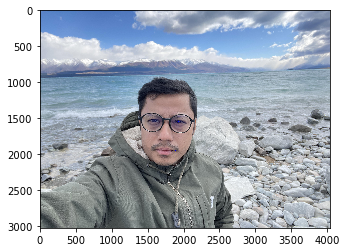

In [18]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()